In [428]:
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import csv
import numpy as np
import os

In [429]:
def get_size(file_name):
    file = open(file_name)
    csvreader = csv.reader(file)
    total = 0
    for row in csvreader:
        total = total +1
    file.close()
    return total
    
def get_header(file_name):
    file = open(file_name)
    csvreader = csv.reader(file)
    header = next(csvreader)[0].split(";")
    return header

def get_row_normalized(file_name,row_name):
    i = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    idx = next(csvreader)[0].split(";").index(row_name)
    print("item index {} = {}".format(row_name,idx))
    x = []
    y = []
    first_val = float(next(csvreader)[0].split(";")[idx])
    print('first_val: {}'.format(first_val))
    for row in csvreader:
        i = i + 1
        itm = row[0].split(";")[idx]
        if not itm == '':
            x.append(i)
            y.append(first_val - float(itm))
    file.close()
    return np.array(x),np.array(y)

    
def plot_row(p, file_name,item,name = None):
    if not item in get_header(file_name):
        print("Error {} not found in {}".format(item,file_name))
        return p

    if item == 'Remaining_space':
        x,row_i = get_row_normalized(file_name,item)
    else:
        x,row_i = get_row(file_name,item)
    if name == None:
        name = os.path.basename(file_name)
    p.plot(x, row_i, label = name)
    return p

def plot_all(title,files,column,filter_files,output_file,legend_map):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    for f in files:
        if filter_files in f:
    #         print(f)
            plot_row(ax,f,column,name=legend_map[f])


    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()
    
def plot_all_multi(title,files,columns,filter_files,output_file,legend_map):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    for f in files:
        if filter_files in f:
            for column in columns:
                plot_row(ax,f,column,name="{}_{}".format(legend_map[f],column))


    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()

In [430]:
path_folder = "../../benchmarks/v3/"
os.listdir(path_folder)

['.DS_Store', 'mac_m1', 'macbook_old.zip', 'new', 'mac_m1.zip', 'mac_pro']

In [224]:
# # Rename files:

# all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path_folder) for f in filenames if os.path.splitext(f)[1] == '.csv']
# print(all_files)
# for f in all_files:
#     if 'mac_pro' in f:     
#         name = f.replace('/2022','/macpro_2022') 
#         os.rename(f,name) 
#     elif 'mac_m1' in f:
#         name = f.replace('/2022','/macM1max_2022')
#         os.rename(f,name)

In [435]:
incremental_files_time = []
incremental_files_size = []
full_files_time = []
full_files_size = []
all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path_folder) for f in filenames if os.path.splitext(f)[1] == '.csv']
all_files.sort()
i = 0
while i<len(all_files):
    
    if "random_full" in all_files[i]:
        full_files_size.append(all_files[i])
        full_files_time.append(all_files[i+1])
    else:
        incremental_files_size.append(all_files[i])
        incremental_files_time.append(all_files[i+1])
    i = i+2
        
    

In [436]:
full_files_size
# print(full_files_time[0])

['../../benchmarks/v3/mac_m1/macM1max_20220328_12_12_55_size_benchmark_random_full_first_iter_1000000_shape_1000-1000-1000_index_100-100-100_commit_10000_compression_False.csv',
 '../../benchmarks/v3/mac_m1/macM1max_20220328_12_13_46_size_benchmark_random_full_first_iter_1000000_shape_1000-1000-1000_index_100-100-100_commit_10000_compression_False.csv',
 '../../benchmarks/v3/mac_m1/macM1max_20220328_12_15_34_size_benchmark_random_full_first_iter_40000_shape_1000-1000-1000_index_100-100-100_commit_100_compression_True.csv',
 '../../benchmarks/v3/mac_m1/macM1max_20220328_12_29_06_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_100_compression_True.csv',
 '../../benchmarks/v3/mac_m1/macM1max_20220328_12_49_02_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_10-10-10_commit_100_compression_True.csv',
 '../../benchmarks/v3/mac_m1/macM1max_20220328_14_13_03_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_1-1-

In [439]:
# Filter them
def get_all_length(list_files):
    result = []
    for f in list_files:
        size = get_size(f)
        result.append(size)
    return result
def show_length(list_files):
    for f in list_files:
        size = get_size(f)
#         print(f)
        print(size)

def filter_length(list_files,second_list, threshold_length):
    result = []
    result2 = []
    for i in range(len(list_files)):
        size = get_size(list_files[i])
        if size>threshold_length:
            result.append(list_files[i])
            result2.append(second_list[i])
            print(i)
            print(list_files[i])
            print(size)
            print(get_size(second_list[i]))
#         else:
#             print(" Not {} {}".format(size,list_files[i]) )
    return result,result2


x = get_all_length(full_files_time)
full_files_time,full_files_size = filter_length(full_files_time,full_files_size,2000)
print(len(full_files_time))

0
../../benchmarks/v3/mac_m1/macM1max_20220328_12_15_34_time_benchmark_random_full_first_iter_40000_shape_1000-1000-1000_index_100-100-100_commit_100_compression_True.csv
3000
91
1
../../benchmarks/v3/mac_m1/macM1max_20220328_12_29_06_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_100_compression_True.csv
5001
152
2
../../benchmarks/v3/mac_m1/macM1max_20220328_12_49_02_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_10-10-10_commit_100_compression_True.csv
5001
152
3
../../benchmarks/v3/mac_pro/macpro_20220329_15_26_13_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_True.csv
5002
114
4
../../benchmarks/v3/mac_pro/macpro_20220329_16_28_34_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_True.csv
5002
114
5
../../benchmarks/v3/mac_pro/macpro_20220329_17_12_21_time_benchmark_random_full_first_iter_5000_shape_1000-100

In [298]:
# full_files_size

In [299]:
# full_files_size[9:10]

In [440]:
# Filter what to process today
full_files_time = full_files_time[6:14]
full_files_size = full_files_size[6:14]
full_files_size

['../../benchmarks/v3/mac_pro/macpro_20220329_19_22_32_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_False.csv',
 '../../benchmarks/v3/mac_pro/macpro_20220329_22_02_48_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_10-10-10_commit_50_compression_False.csv',
 '../../benchmarks/v3/mac_pro/macpro_20220330_11_46_56_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_True.csv',
 '../../benchmarks/v3/mac_pro/macpro_20220330_12_31_09_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_10-10-10_commit_50_compression_True.csv',
 '../../benchmarks/v3/new/20220330_21_54_20_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_10_compression_True.csv',
 '../../benchmarks/v3/new/20220330_22_51_41_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_50-50-50_commit_10_compression_True.csv',
 '../../b

In [456]:
# reorder
# full_files_size
order = [0,1,6,7,2,3,4,5]
new_sizes = [full_files_size[i] for i in order]
new_times = [full_files_time[i] for i in order]
full_files_time = new_times
full_files_size = new_sizes

In [457]:
def get_descriptions(list_elms):
    st_map = {}
    for f in list_elms:  
        n = os.path.basename(f)
        n = n.replace('benchmark_random_full_first_iter_','')
        n = n.replace('_shape_1000-1000-1000','')
        n = n.replace('40000_','')
        n = n.replace('5000_','')
        n = n.replace('benchmark_1M_','')
        n = n.replace('.csv','')
        n = n.replace('_size_','')
        n = n.replace('_time_','')
        ind = n.index('20220')
        n = n.replace(n[ind:ind+17],'')
        n = n.replace('1000p3','(1000,1000,1000)')
        n = n.replace('macpro_','')
        n = n.replace('100p3','(100,100,100)')
        n = n.replace('1p3','(1,1,1)')
        n = n.replace('50(','50_(')
        n = n.replace('index_(','index(')
        n = n.replace('_(1000,1000,1000)','_shape(1000,1000,1000)')
        n = n.replace('_shape(1000,1000,1000)','')
    #     print(n)
        st_map[f] = n
    return st_map

print(get_descriptions(full_files_time).values())


dict_values(['index_100-100-100_commit_50_compression_False', 'index_10-10-10_commit_50_compression_False', 'index_100-100-100_commit_10_compression_False', 'index_50-50-50_commit_10_compression_False', 'index_100-100-100_commit_50_compression_True', 'index_10-10-10_commit_50_compression_True', 'index_100-100-100_commit_10_compression_True', 'index_50-50-50_commit_10_compression_True'])


In [458]:
time_benchmark = full_files_time[0]
size_benchmark = full_files_size[0]
print(time_benchmark)

../../benchmarks/v3/mac_pro/macpro_20220329_19_22_32_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_False.csv


In [459]:
i = 0
iterations = 20000
gc_step = 400
du_step = 800
df_step = 50
incremental_du_step = du_step
pos = []
dus = []
pos.append(i)
dus.append(0)
i_gc = 0
i_df = 0
i_du = 0

for i in range(iterations):
    i_gc = i_gc + 1
    i_df = i_df + 1
    i_du = i_du + 1

    if i_gc == gc_step:
        i_gc = 0
        pos.append(i)
        dus.append(0)

    if df_step == i_df:
        i_df = 0
        if incremental_du_step == i_du:
            incremental_du_step = incremental_du_step * 2
            i_du = 0
            pos.append(i)
            dus.append(1)
        else:
            pos.append(i)
            dus.append(0)
            
print(pos)


[0, 49, 99, 149, 199, 249, 299, 349, 399, 399, 449, 499, 549, 599, 649, 699, 749, 799, 799, 849, 899, 949, 999, 1049, 1099, 1149, 1199, 1199, 1249, 1299, 1349, 1399, 1449, 1499, 1549, 1599, 1599, 1649, 1699, 1749, 1799, 1849, 1899, 1949, 1999, 1999, 2049, 2099, 2149, 2199, 2249, 2299, 2349, 2399, 2399, 2449, 2499, 2549, 2599, 2649, 2699, 2749, 2799, 2799, 2849, 2899, 2949, 2999, 3049, 3099, 3149, 3199, 3199, 3249, 3299, 3349, 3399, 3449, 3499, 3549, 3599, 3599, 3649, 3699, 3749, 3799, 3849, 3899, 3949, 3999, 3999, 4049, 4099, 4149, 4199, 4249, 4299, 4349, 4399, 4399, 4449, 4499, 4549, 4599, 4649, 4699, 4749, 4799, 4799, 4849, 4899, 4949, 4999, 5049, 5099, 5149, 5199, 5199, 5249, 5299, 5349, 5399, 5449, 5499, 5549, 5599, 5599, 5649, 5699, 5749, 5799, 5849, 5899, 5949, 5999, 5999, 6049, 6099, 6149, 6199, 6249, 6299, 6349, 6399, 6399, 6449, 6499, 6549, 6599, 6649, 6699, 6749, 6799, 6799, 6849, 6899, 6949, 6999, 7049, 7099, 7149, 7199, 7199, 7249, 7299, 7349, 7399, 7449, 7499, 7549, 7599, 

In [460]:
def print_file_pos(pos,dus,file_name):
    index = -1
    file = open(file_name)
    csvreader = csv.reader(file)
    for row in csvreader:
        if index == -1:
            print ("{:<5}".format("i"), end = '\t')
            index = index +1
        else:
            print ("{:<2}-{:<2}".format(pos[index],dus[index]), end = '\t')
            index = index +1
        itm = row[0].split(";")
        for i in itm:
            print ("{:<20}".format(i), end = '\t')
        print("\n")
       
print(full_files_size[0])
print(get_size(full_files_time[0]))
print_file_pos(pos,dus,full_files_size[3])

../../benchmarks/v3/mac_pro/macpro_20220329_19_22_32_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_False.csv
5002
i    	index               	Remaining_space     	DU_Size             	Used_Size_df        	

0 -0 	0                   	1757015024          	                    	190891088           	

49-0 	49                  	1756964392          	                    	190941720           	

99-0 	99                  	1756913848          	                    	190992264           	

149-0 	149                 	1756863256          	                    	191042856           	

199-0 	199                 	1757343000          	                    	190563112           	

249-0 	199                 	1757329632          	                    	190576480           	

299-0 	249                 	1757278448          	                    	190627664           	

349-0 	299                 	1757225192          	                    	190680920         

In [233]:
print(time_benchmark)
get_header(time_benchmark)

../../benchmarks/v3/mac_pro/macpro_20220329_16_28_34_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_True.csv


['Writing_index_time', 'Commit_time', 'Checkout_time', 'GC_time']

In [234]:
print(size_benchmark)
get_header(size_benchmark)

../../benchmarks/v3/mac_pro/macpro_20220329_16_28_34_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_True.csv


['Remaining_space', 'DU_Size', 'Used_Size_df']

In [235]:
def get_row(file_name,row_name):
    
    i = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    idx = next(csvreader)[0].split(";").index(row_name)
    print("item index {} = {}".format(row_name,idx))
    x = []
    y = []
    for row in csvreader:
        i = i + 1
        itm = row[0].split(";")[idx]
        if not itm == '':
            val = float(itm)
            if val == 0:
                x.append(i)
                y.append(np.nan)
            else:
                x.append(i)
                y.append(float(itm))
    file.close()
    return np.array(x),np.array(y)

x,y = get_row(time_benchmark,"Writing_index_time")
y

item index Writing_index_time = 0


array([1.57597434e+02, 1.44340992e-02, 9.89484787e-03, ...,
       9.92298126e-03, 1.02200508e-02, 9.98306274e-03])

In [236]:


print(get_row(time_benchmark,"Writing_index_time"))


item index Writing_index_time = 0
(array([   1,    2,    3, ..., 4999, 5000, 5001]), array([1.57597434e+02, 1.44340992e-02, 9.89484787e-03, ...,
       9.92298126e-03, 1.02200508e-02, 9.98306274e-03]))


item index Used_Size_df = 2
got Used_Size_df


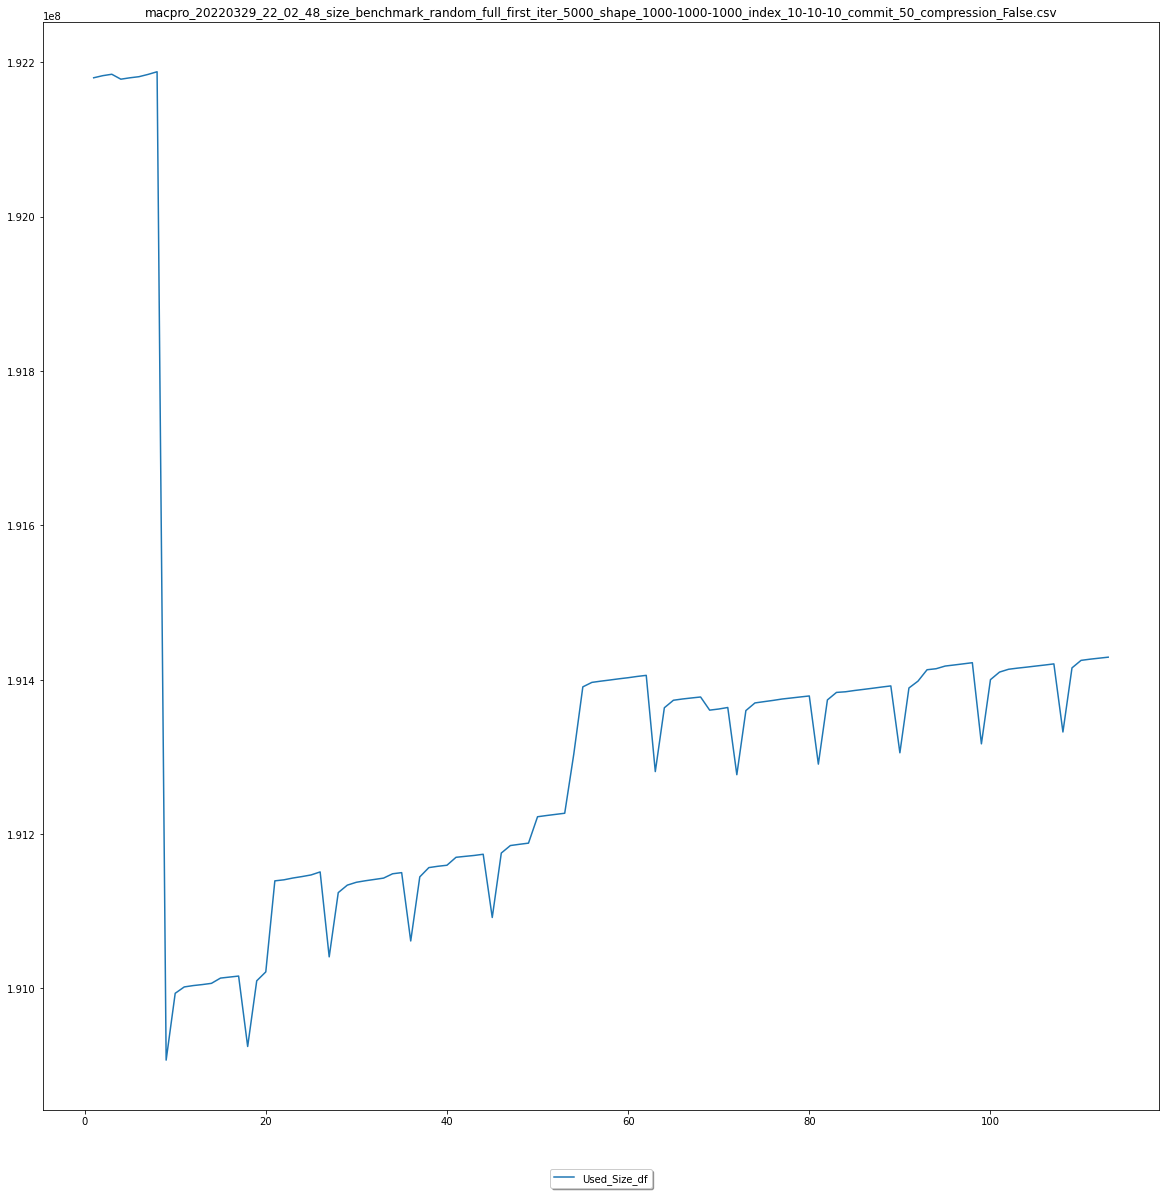

In [237]:
def plot_file(file_name,save_name= None,items = None,title = None):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    if items == None:
        items = get_header(file_name)

    for item in items:
        if item == 'Remaining_space':
            x,row_i = get_row_normalized(file_name,item)
        else:
            x,row_i = get_row(file_name,item)
#             x = x[1:]
#             row_i = row_i[1:]
        ax.plot(x, row_i, label = item)
        print('got {}'.format(item))
    # naming the x axis
#     plt.xlabel('x - axis')
#     # naming the y axis
#     plt.ylabel('y - axis')
    # giving a title to my graph
    if save_name == None:
        save_name = '{}.png'.format(os.path.basename(file_name))
    if title == None:
        title = os.path.basename(file_name)
    plt.title(title)
    # show a legend on the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
#     plt.savefig(save_name)
    # function to show the plot
    plt.show()

plot_file(full_files_size[3],items= [ 'Used_Size_df'])

item index Remaining_space = 0
first_val: 1769905656.0
got Remaining_space
item index DU_Size = 1
got DU_Size
item index Used_Size_df = 2
got Used_Size_df


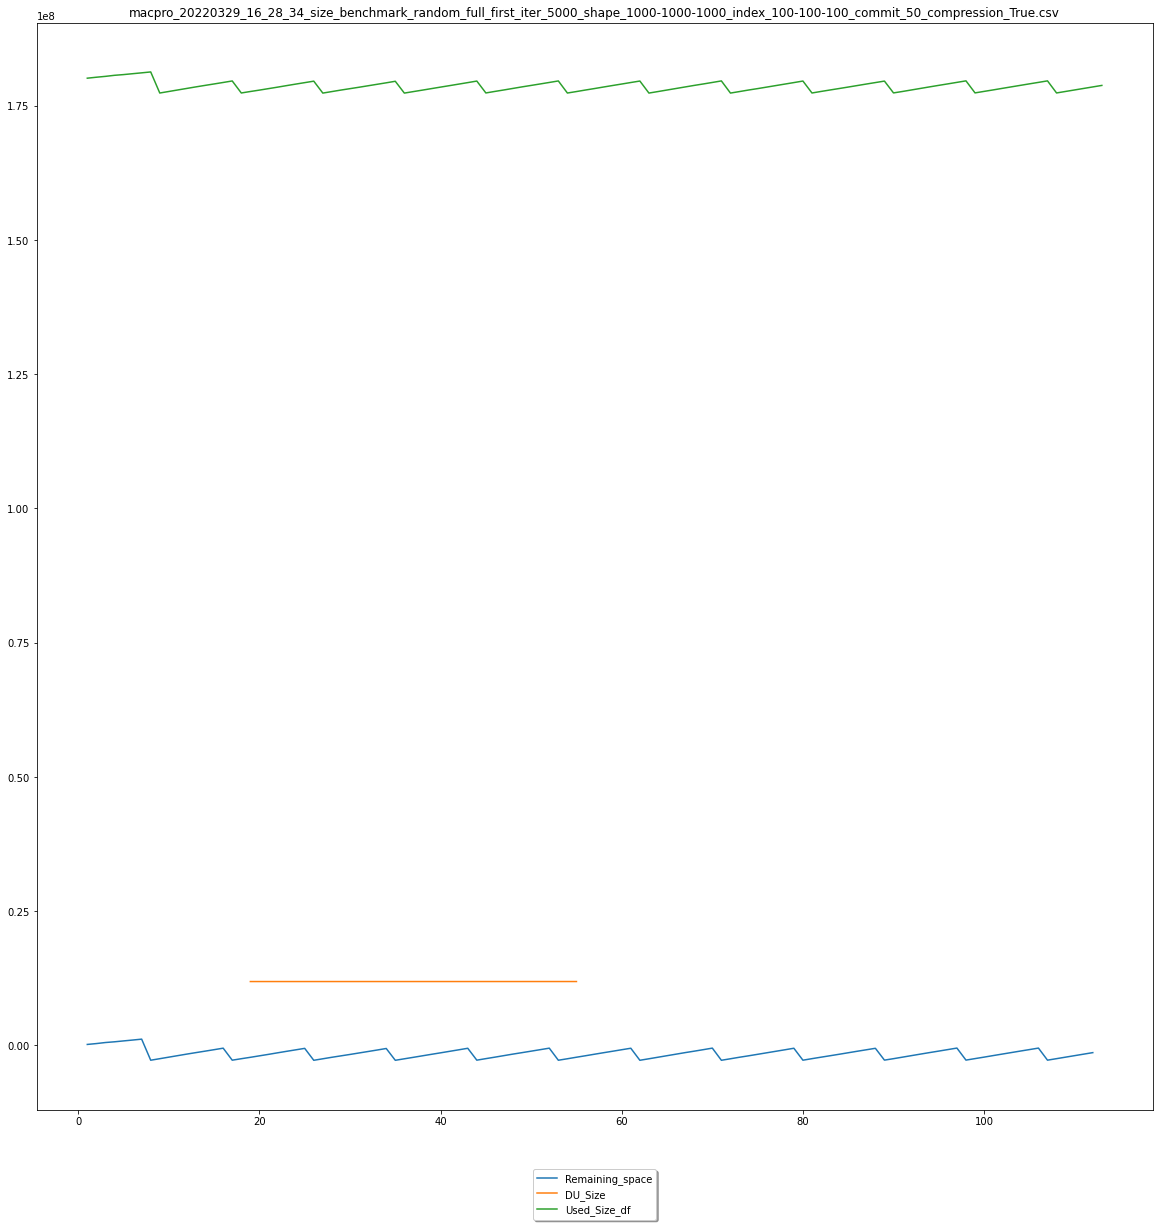

In [238]:
plot_file(size_benchmark)

In [ ]:
get_header(size_benchmark)

In [ ]:
plot_all(title="Remaining space inverted",files=files_to_process,column='Remaining_space',filter_files='size_benchmark',output_file='all_remainng_space.png',legend_map=st_map)


In [ ]:
# Remaing space 2
filtred_files = []
for f in files_to_process:
    if 'size_benchmark' in f:
        if '100p3' in f:
            if 'True' in f:
                filtred_files.append(f)
        else:
            filtred_files.append(f)

plot_all(title="Remaining space inverted",files=filtred_files,column='Remaining_space',filter_files='.csv',output_file='all_remainng_space_filtred_flat.png',legend_map=st_map)


In [ ]:

plot_all(title="Logic_Size",files=files_to_process,column='Logic_Size',filter_files='size_benchmark',output_file='Logic_Size.png',legend_map=st_map)


In [ ]:
plot_all(title="DU_Size",files=files_to_process,column='DU_Size',filter_files='size_benchmark',output_file='DU_Size.png',legend_map=st_map)

In [ ]:

plot_all(title="Used_Size_df",files=files_to_process,column='Used_Size_df',filter_files='size_benchmark',output_file='Used_Size_df.png',legend_map=st_map)


In [ ]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="GC_time",files=files_to_process,columns=['GC_time'],filter_files='time_benchmark',output_file='GC_time.png',legend_map=st_map)


In [ ]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Writing_index_time",files=files_to_process,columns=['Writing_index_time'],filter_files='time_benchmark',output_file='Writing_index_time.png',legend_map=st_map)


In [ ]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Get_new_index_time",files=files_to_process,columns=['Get_new_index_time'],filter_files='time_benchmark',output_file='Get_new_index_time.png',legend_map=st_map)


In [ ]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Checkout_time",files=files_to_process,columns=['Checkout_time'],filter_files='time_benchmark',output_file='Checkout_time.png',legend_map=st_map)


In [ ]:
# ['Reading_time',
#  'Writing_index_time',
#  'Get_new_index_time',
#  'Write_raw_data_time',
#  'Commit_time',
#  'Checkout_time',
#  'GC_time']
plot_all_multi(title="Commit_time",files=files_to_process,columns=['Commit_time'],filter_files='time_benchmark',output_file='Commit_time.png',legend_map=st_map)


In [ ]:
f1 = 'benchmarks/v2/benchmaks_mac_16gb/macpro_20220322_12_58_13_time_benchmark_1M_checkout_50_size_1000p3_index_1p3_compression_False.csv'
for f in files_to_process:
    if '_time_benchmark' in f:
        plot_file(f,title=st_map[f])


# Size plot 

In [130]:
!df .
# 355Gi
# 743865632

Filesystem   512-blocks      Used Available Capacity iused     ifree %iused  Mounted on
/dev/disk1s1  976490568 743865632 160187336    83% 4266899 800936680    1%   /System/Volumes/Data


In [136]:
!df -h .

Filesystem     Size   Used  Avail Capacity iused     ifree %iused  Mounted on
/dev/disk1s1  466Gi  355Gi   75Gi    83% 4267058 790453720    1%   /System/Volumes/Data


In [139]:
743865632/1024/2048

354.70277404785156

In [461]:
legends = get_descriptions(full_files_size)
list(legends.keys())

['../../benchmarks/v3/mac_pro/macpro_20220329_19_22_32_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_False.csv',
 '../../benchmarks/v3/mac_pro/macpro_20220329_22_02_48_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_10-10-10_commit_50_compression_False.csv',
 '../../benchmarks/v3/new/20220330_23_06_12_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_10_compression_False.csv',
 '../../benchmarks/v3/new/20220331_02_21_52_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_50-50-50_commit_10_compression_False.csv',
 '../../benchmarks/v3/mac_pro/macpro_20220330_11_46_56_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_True.csv',
 '../../benchmarks/v3/mac_pro/macpro_20220330_12_31_09_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_10-10-10_commit_50_compression_True.csv',
 '../..

In [462]:
print(size_benchmark)
get_header(size_benchmark)

../../benchmarks/v3/mac_pro/macpro_20220329_19_22_32_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_False.csv


['Remaining_space', 'DU_Size', 'Used_Size_df']

In [513]:
def get_size_row(file_name,row_name):
    file = open(file_name)
    csvreader = csv.reader(file)
    head = next(csvreader)[0].split(";")
    idx = head.index(row_name)
    print("item index {} = {}".format(row_name,idx))
    x = []
    for row in csvreader:
        itm = row[0].split(";")[idx]
        if itm != '':
            val = int(itm)
            x.append(val)
    file.close()
    return x


def get_size_row_indexed(indeces,file_name,row_name,first):
    
    i = 0
    initial = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    head = next(csvreader)[0].split(";")
    if "index" in head:
        indeces = get_size_row(file_name,"index")
    idx = head.index(row_name)
    print("item index {} = {}".format(row_name,idx))
    if first == 1:
        first = float(next(csvreader)[0].split(";")[idx])
    x = []
    y = []
    for row in csvreader:
        itm = row[0].split(";")[idx]
        if itm == '':
            if i ==0 :
                return np.array(x),np.array(y)
        else:
            val = float(itm)
            if val > 0:
                size = float(itm) 
                if i == 0:
                    initial = size
                size = size - first
                size = size/2048/1024
                if i ==0 or indeces[i]>indeces[i-1]:
                    x.append(indeces[i])
                    y.append(size)
        i = i + 1
    file.close()
    return np.array(x),np.array(y)

def get_size_row_incremental(indeces,file_name,row_name,first):
    
    i = 0
    max_val = 0
    initial = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    head = next(csvreader)[0].split(";")
    if "index" in head:
        indeces = get_size_row(file_name,"index")
    idx = head.index(row_name)
    print("item index {} = {}".format(row_name,idx))
    if first == 1:
        first = float(next(csvreader)[0].split(";")[idx])
    x = []
    y = []
    for row in csvreader:
        itm = row[0].split(";")[idx]
        if itm == '':
            if i ==0 :
                return np.array(x),np.array(y)
        else:
            val = float(itm)
            if max_val == 0:
                max_val = val
                continue
                val = 0
            if val > 0:
                size = float(itm) 
                
                size = size - max_val
                if size < 0:
                    size = 0
                    max_val = float(itm)
                elif float(itm) > max_val:
                    max_val = float(itm)
                size = size/2048
                if i ==0 or indeces[i]>indeces[i-1]:
                    x.append(indeces[i])
                    y.append(size)
        i = i + 1
    file.close()
    return np.array(x),np.array(y)


print(get_size_row_incremental(pos,full_files_size[0],'Used_Size_df',first=1))

item index Used_Size_df = 2
(array([   0,   49,   99,  149,  199,  249,  299,  349,  399,  449,  499,
        549,  599,  649,  699,  749,  799,  849,  899,  949,  999, 1049,
       1099, 1149, 1199, 1249, 1299, 1349, 1399, 1449, 1499, 1549, 1599,
       1649, 1699, 1749, 1799, 1849, 1899, 1949, 1999, 2049, 2099, 2149,
       2199, 2249, 2299, 2349, 2399, 2449, 2499, 2549, 2599, 2649, 2699,
       2749, 2799, 2849, 2899, 2949, 2999, 3049, 3099, 3149, 3199, 3249,
       3299, 3349, 3399, 3449, 3499, 3549, 3599, 3649, 3699, 3749, 3799,
       3849, 3899, 3949, 3999, 4049, 4099, 4149, 4199, 4249, 4299, 4349,
       4399, 4449, 4499, 4549, 4599, 4649, 4699, 4749, 4799, 4849, 4899]), array([189.984375  , 182.625     , 193.88671875, 193.8671875 ,
       201.109375  , 165.4296875 ,   0.        , 186.40234375,
       186.171875  , 193.921875  , 186.1171875 , 186.12890625,
       182.2265625 , 189.98046875,   0.        , 194.078125  ,
       186.26171875, 186.0703125 , 186.12109375, 186.1054687

In [516]:
legends

{'../../benchmarks/v3/mac_pro/macpro_20220329_19_22_32_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_False.csv': 'index_100-100-100_commit_50_compression_False',
 '../../benchmarks/v3/mac_pro/macpro_20220329_22_02_48_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_10-10-10_commit_50_compression_False.csv': 'index_10-10-10_commit_50_compression_False',
 '../../benchmarks/v3/new/20220330_23_06_12_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_10_compression_False.csv': 'index_100-100-100_commit_10_compression_False',
 '../../benchmarks/v3/new/20220331_02_21_52_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_50-50-50_commit_10_compression_False.csv': 'index_50-50-50_commit_10_compression_False',
 '../../benchmarks/v3/mac_pro/macpro_20220330_11_46_56_size_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compres

item index Used_Size_df = 2
item index Used_Size_df = 2
item index index = 0
item index Used_Size_df = 3
item index index = 0
item index Used_Size_df = 3
item index Used_Size_df = 2
item index Used_Size_df = 2
item index index = 0
item index Used_Size_df = 3
item index index = 0
item index Used_Size_df = 3


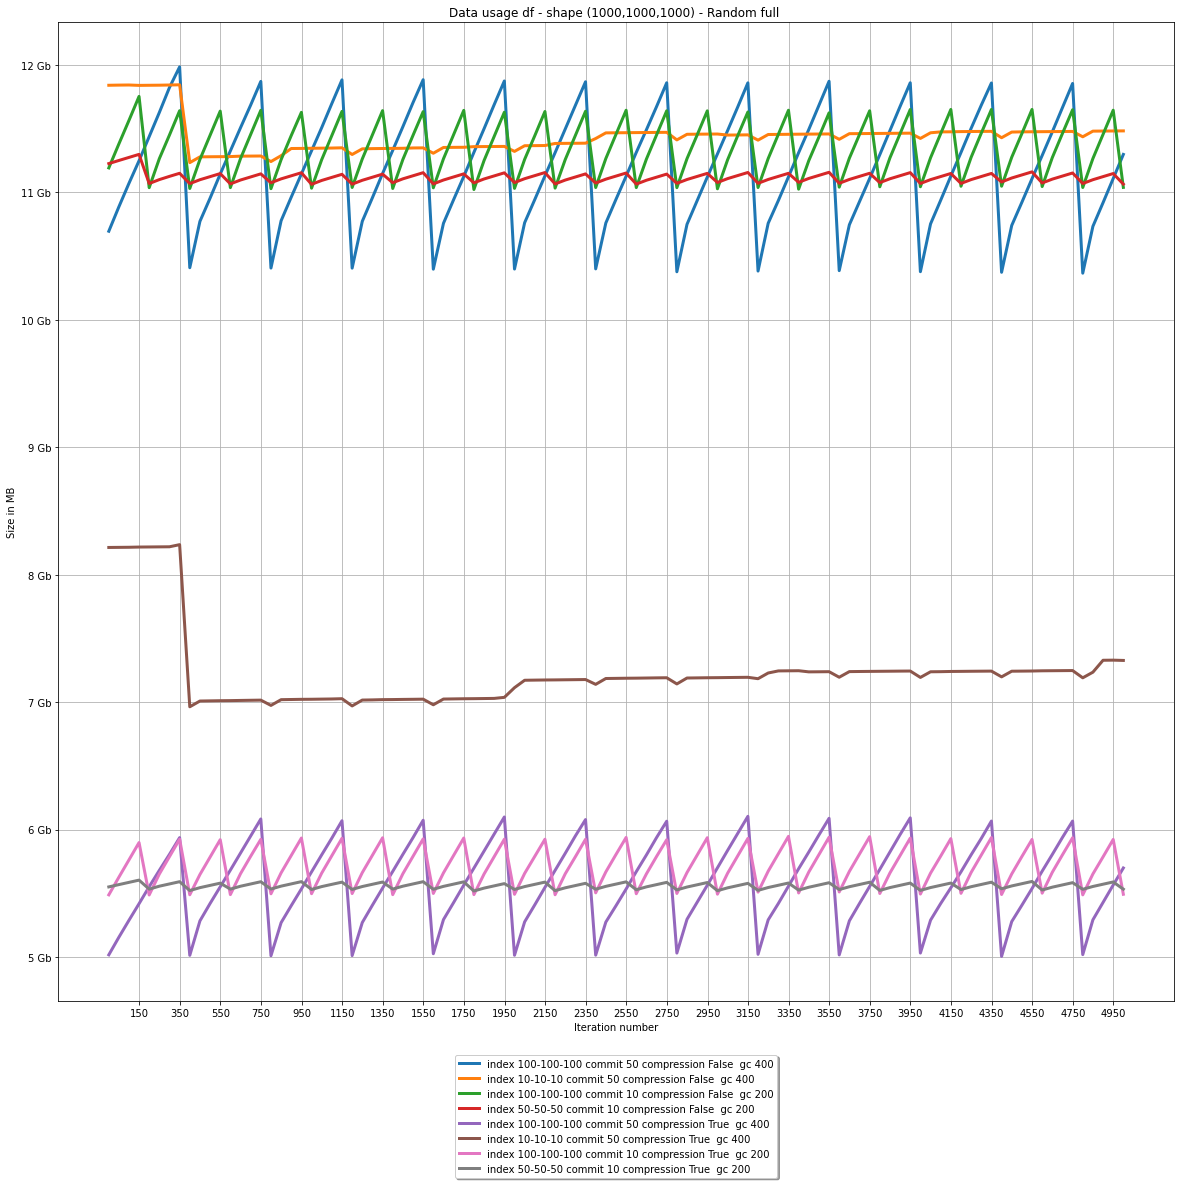

In [518]:
def plot_size_usage(pos,title,files,columns,filer_name,output_file,legend_map,first  = 167347888):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    grid_x  = []
    
    for f in files:
        if filer_name in f:
            for column in columns:
                x,y = get_size_row_indexed(pos,f,column,first)
                if len(x)==0:    
                    print("None "+f)
                else:
                    grid_x = x
                    gc=" gc "
                    if "commit_10" in f:
                        gc = gc + "200"
                    else:
                        gc = gc+ "400"
                    name="{}_{} {}".format(legend_map[f],column,gc).replace("macpro_","")

                    name = name.replace("_Used_Size_df","")

    #                 name = name.replace("_commit_50","")
                    name = name.replace("_"," ")
                    ax.plot(x, y, '-', lw=3,label = name)
            



    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    plt.xlabel("Iteration number")
    plt.ylabel("Size in MB")
    grid_elm = grid_x
    
    grid_x = []
    jump = 3
    i = 0

    for x in grid_elm:
        if i == jump:
            i=0
            grid_x.append(x+1)
        else:
            i = i+1
    plt.xticks(grid_x)
#     plt.xscale('mercator')
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d Gb'))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()


    
plot_size_usage(pos=pos,title="Data usage df - shape (1000,1000,1000) - Random full ",files=full_files_size,columns=['Used_Size_df'], filer_name ="",output_file='full_Used_Size_df_new.png',legend_map=legends)


item index Used_Size_df = 2
item index Used_Size_df = 2
item index index = 0
item index Used_Size_df = 3
item index index = 0
item index Used_Size_df = 3
item index Used_Size_df = 2
item index Used_Size_df = 2
item index index = 0
item index Used_Size_df = 3
item index index = 0
item index Used_Size_df = 3


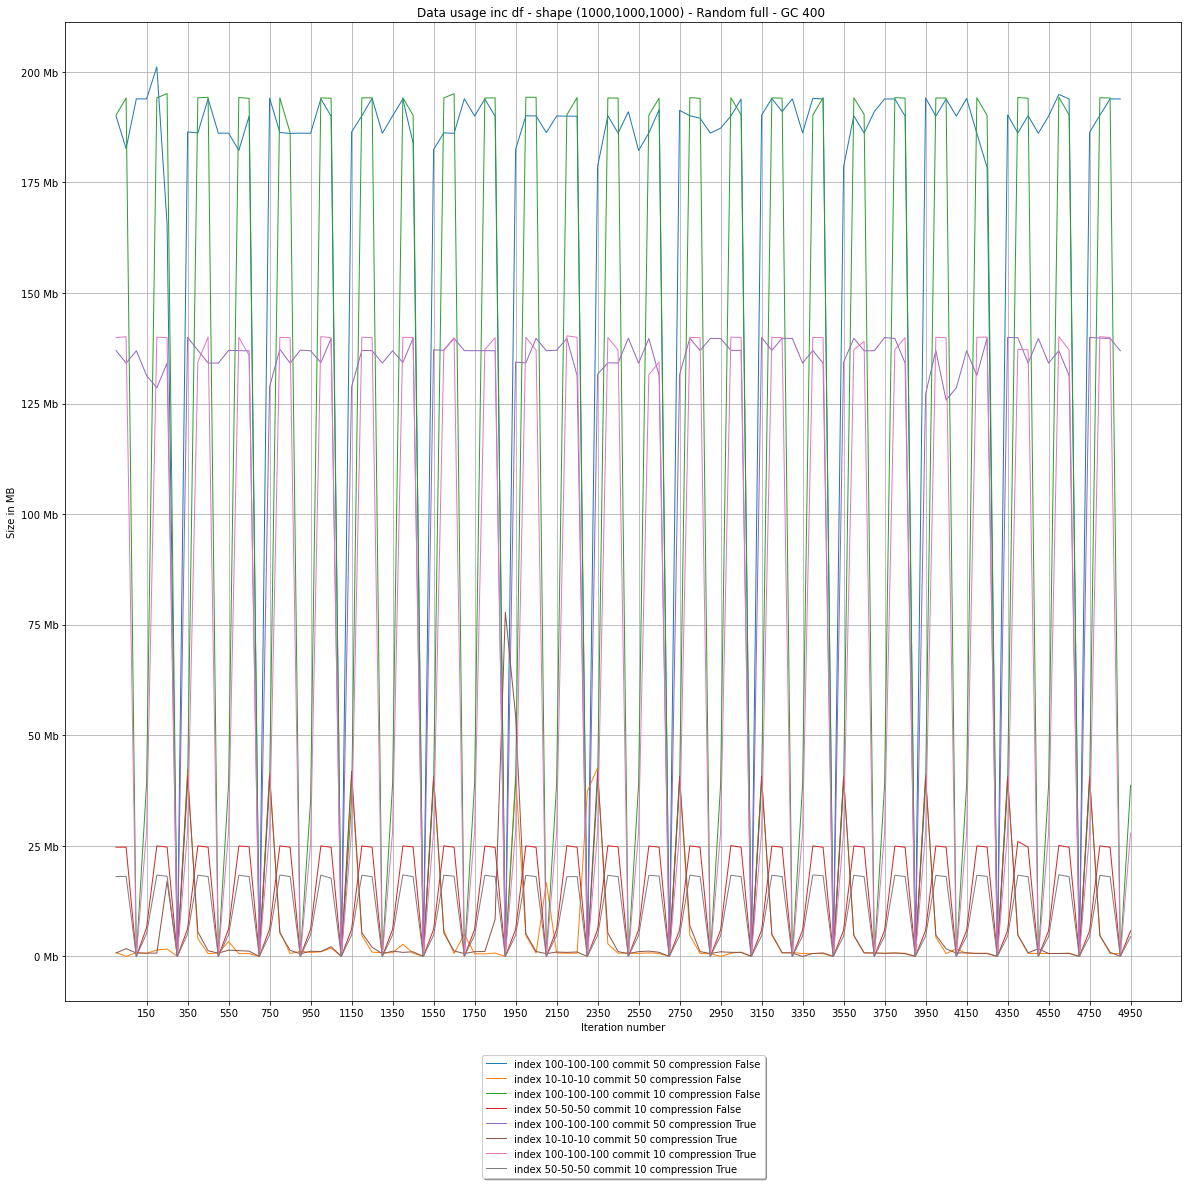

In [515]:
def plot_size_usage_inc(pos,title,files,columns,filer_name,output_file,legend_map,first  = 1):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    grid_x  = []
    
    for f in files:
        if filer_name in f:
            for column in columns:
                x,y = get_size_row_incremental(pos,f,column,first)
                if len(x)==0:    
                    print("None "+f)
                else:
                    grid_x = x
                    name="{}_{}".format(legend_map[f],column).replace("macpro_","")

                    name = name.replace("_Used_Size_df","")

    #                 name = name.replace("_commit_50","")
                    name = name.replace("_"," ")
                    ax.plot(x, y, '-', lw=1,label = name)
            



    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    plt.xlabel("Iteration number")
    plt.ylabel("Size in MB")
    grid_elm = grid_x
    
    grid_x = []
    jump = 3
    i = 0

    for x in grid_elm:
        if i == jump:
            i=0
            grid_x.append(x+1)
        else:
            i = i+1
    plt.xticks(grid_x)
#     plt.xscale('mercator')
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d Mb'))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()


    
plot_size_usage_inc(pos=pos,title="Data usage inc df - shape (1000,1000,1000) - Random full - GC 400 ",files=full_files_size,columns=['Used_Size_df'], filer_name ="",output_file='full_inc_Used_Size_df_new.png',legend_map=legends)


In [472]:
# plot_size_usage(pos=pos,title="Data usage DU - shape (1000,1000,1000) - Random full - Commit 50 - GC 400 ",files=full_files_size,columns=['DU_Size'], filer_name ="",output_file='full_Used_Size_du_new.png',legend_map=legends)


# Time

In [475]:
def print_file(file_name,index_progression = 1):
    index = -1
    file = open(file_name)
    csvreader = csv.reader(file)
    for row in csvreader:
        if index == -1:
            print ("{:<10}".format("i"), end = '\t')
            index = index +1
        else:
            print ("{:<10}".format(index), end = '\t')
            index = index +index_progression
        itm = row[0].split(";")
        for i in itm:
            print ("{:<20}".format(i), end = '\t')
        print("\n")
        


print(len(full_files_time))
print(get_header(full_files_time[0]))
print(full_files_time[0])
print(get_size(full_files_time[0]))
print_file(full_files_time[0])

8
['Writing_index_time', 'Commit_time', 'Checkout_time', 'GC_time']
../../benchmarks/v3/mac_pro/macpro_20220329_19_22_32_time_benchmark_random_full_first_iter_5000_shape_1000-1000-1000_index_100-100-100_commit_50_compression_False.csv
5002
i         	Writing_index_time  	Commit_time         	Checkout_time       	GC_time             	

0         	226.0855610370636   	0.13292884826660156 	                    	                    	

1         	0.1453111171722412  	                    	                    	                    	

2         	0.011137962341308594	                    	                    	                    	

3         	0.00900721549987793 	                    	                    	                    	

4         	0.011708974838256836	                    	                    	                    	

5         	0.012164115905761719	                    	                    	                    	

6         	0.00793766975402832 	                    	                    	       


260       	0.012803792953491211	                    	                    	                    	

261       	0.008536100387573242	                    	                    	                    	

262       	0.008026123046875   	                    	                    	                    	

263       	0.01183629035949707 	                    	                    	                    	

264       	0.00828695297241211 	                    	                    	                    	

265       	0.008794069290161133	                    	                    	                    	

266       	0.008538007736206055	                    	                    	                    	

267       	0.00855398178100586 	                    	                    	                    	

268       	0.008563756942749023	                    	                    	                    	

269       	0.009640932083129883	                    	                    	                    	

270       	0.0091569423675537

509       	0.013766765594482422	                    	                    	                    	

510       	0.009480953216552734	                    	                    	                    	

511       	0.014863967895507812	                    	                    	                    	

512       	0.015017986297607422	                    	                    	                    	

513       	0.015236139297485352	                    	                    	                    	

514       	0.014209985733032227	                    	                    	                    	

515       	0.010434150695800781	                    	                    	                    	

516       	0.008672952651977539	                    	                    	                    	

517       	0.013004779815673828	                    	                    	                    	

518       	0.008593082427978516	                    	                    	                    	

519       	0.01343584060668945

759       	0.014001846313476562	                    	                    	                    	

760       	0.01082921028137207 	                    	                    	                    	

761       	0.007952213287353516	                    	                    	                    	

762       	0.014697790145874023	                    	                    	                    	

763       	0.008339881896972656	                    	                    	                    	

764       	0.008519887924194336	                    	                    	                    	

765       	0.01804184913635254 	                    	                    	                    	

766       	0.014498233795166016	                    	                    	                    	

767       	0.01620197296142578 	                    	                    	                    	

768       	0.011137247085571289	                    	                    	                    	

769       	0.01507973670959472

926       	0.01560211181640625 	                    	                    	                    	

927       	0.012690067291259766	                    	                    	                    	

928       	0.013309955596923828	                    	                    	                    	

929       	0.011156797409057617	                    	                    	                    	

930       	0.01775193214416504 	                    	                    	                    	

931       	0.009653329849243164	                    	                    	                    	

932       	0.009829998016357422	                    	                    	                    	

933       	0.011291742324829102	                    	                    	                    	

934       	0.008285999298095703	                    	                    	                    	

935       	0.014544963836669922	                    	                    	                    	

936       	0.01898598670959472


1093      	0.009546041488647461	                    	                    	                    	

1094      	0.013339042663574219	                    	                    	                    	

1095      	0.012731790542602539	                    	                    	                    	

1096      	0.011288166046142578	                    	                    	                    	

1097      	0.01660609245300293 	                    	                    	                    	

1098      	0.013434171676635742	                    	                    	                    	

1099      	0.018330097198486328	                    	                    	                    	

1100      	0.013952970504760742	9.453634023666382   	                    	                    	

1101      	0.01747608184814453 	                    	                    	                    	

1102      	0.010157108306884766	                    	                    	                    	

1103      	0.0109848976135253

1259      	0.011812686920166016	                    	                    	                    	

1260      	0.009553194046020508	                    	                    	                    	

1261      	0.013909101486206055	                    	                    	                    	

1262      	0.010461091995239258	                    	                    	                    	

1263      	0.016810178756713867	                    	                    	                    	

1264      	0.010071754455566406	                    	                    	                    	

1265      	0.008839845657348633	                    	                    	                    	

1266      	0.013720273971557617	                    	                    	                    	

1267      	0.010453939437866211	                    	                    	                    	

1268      	0.010534048080444336	                    	                    	                    	

1269      	0.01423811912536621

1426      	0.0156857967376709  	                    	                    	                    	

1427      	0.018110036849975586	                    	                    	                    	

1428      	0.008092880249023438	                    	                    	                    	

1429      	0.011337995529174805	                    	                    	                    	

1430      	0.015168190002441406	                    	                    	                    	

1431      	0.014166831970214844	                    	                    	                    	

1432      	0.012215852737426758	                    	                    	                    	

1433      	0.014245748519897461	                    	                    	                    	

1434      	0.017399072647094727	                    	                    	                    	

1435      	0.01547384262084961 	                    	                    	                    	

1436      	0.00799202919006347

1596      	0.008426189422607422	                    	                    	                    	

1597      	0.014808893203735352	                    	                    	                    	

1598      	0.008221149444580078	                    	                    	                    	

1599      	0.008806943893432617	                    	                    	                    	

1600      	0.014508724212646484	9.541776895523071   	                    	643.4877729415894   	

1601      	0.014789819717407227	                    	                    	                    	

1602      	0.013666152954101562	                    	                    	                    	

1603      	0.009735107421875   	                    	                    	                    	

1604      	0.009402036666870117	                    	                    	                    	

1605      	0.014333963394165039	                    	                    	                    	

1606      	0.01396012306213378

1759      	0.014717340469360352	                    	                    	                    	

1760      	0.015210151672363281	                    	                    	                    	

1761      	0.019999980926513672	                    	                    	                    	

1762      	0.011165857315063477	                    	                    	                    	

1763      	0.014613866806030273	                    	                    	                    	

1764      	0.009446859359741211	                    	                    	                    	

1765      	0.01901388168334961 	                    	                    	                    	

1766      	0.01617264747619629 	                    	                    	                    	

1767      	0.008349180221557617	                    	                    	                    	

1768      	0.010840892791748047	                    	                    	                    	

1769      	0.01977586746215820

2009      	0.012414216995239258	                    	                    	                    	

2010      	0.009840011596679688	                    	                    	                    	

2011      	0.01546025276184082 	                    	                    	                    	

2012      	0.01691603660583496 	                    	                    	                    	

2013      	0.010310888290405273	                    	                    	                    	

2014      	0.015494108200073242	                    	                    	                    	

2015      	0.018343210220336914	                    	                    	                    	

2016      	0.009219884872436523	                    	                    	                    	

2017      	0.010769844055175781	                    	                    	                    	

2018      	0.007818937301635742	                    	                    	                    	

2019      	0.00866723060607910

2175      	0.02593684196472168 	                    	                    	                    	

2176      	0.017008066177368164	                    	                    	                    	

2177      	0.009717941284179688	                    	                    	                    	

2178      	0.007769107818603516	                    	                    	                    	

2179      	0.00939178466796875 	                    	                    	                    	

2180      	0.010030031204223633	                    	                    	                    	

2181      	0.01984119415283203 	                    	                    	                    	

2182      	0.011158943176269531	                    	                    	                    	

2183      	0.010456085205078125	                    	                    	                    	

2184      	0.018033981323242188	                    	                    	                    	

2185      	0.01401495933532714

2342      	0.008695840835571289	                    	                    	                    	

2343      	0.008275985717773438	                    	                    	                    	

2344      	0.015874862670898438	                    	                    	                    	

2345      	0.017264842987060547	                    	                    	                    	

2346      	0.011599063873291016	                    	                    	                    	

2347      	0.010270833969116211	                    	                    	                    	

2348      	0.013725042343139648	                    	                    	                    	

2349      	0.014791727066040039	                    	                    	                    	

2350      	0.010016918182373047	9.290389060974121   	                    	                    	

2351      	0.014833927154541016	                    	                    	                    	

2352      	0.01208400726318359

2527      	0.016157865524291992	                    	                    	                    	

2528      	0.019681930541992188	                    	                    	                    	

2529      	0.019889116287231445	                    	                    	                    	

2530      	0.008147954940795898	                    	                    	                    	

2531      	0.010345935821533203	                    	                    	                    	

2532      	0.01600813865661621 	                    	                    	                    	

2533      	0.013183355331420898	                    	                    	                    	

2534      	0.009862899780273438	                    	                    	                    	

2535      	0.008220195770263672	                    	                    	                    	

2536      	0.019708871841430664	                    	                    	                    	

2537      	0.01088595390319824

2722      	0.009248018264770508	                    	                    	                    	

2723      	0.01835322380065918 	                    	                    	                    	

2724      	0.015964269638061523	                    	                    	                    	

2725      	0.01464080810546875 	                    	                    	                    	

2726      	0.015910863876342773	                    	                    	                    	

2727      	0.008172035217285156	                    	                    	                    	

2728      	0.014432907104492188	                    	                    	                    	

2729      	0.018810033798217773	                    	                    	                    	

2730      	0.008144855499267578	                    	                    	                    	

2731      	0.022327661514282227	                    	                    	                    	

2732      	0.01338601112365722

2842      	0.008803844451904297	                    	                    	                    	

2843      	0.009244918823242188	                    	                    	                    	

2844      	0.0160367488861084  	                    	                    	                    	

2845      	0.017887115478515625	                    	                    	                    	

2846      	0.017635107040405273	                    	                    	                    	

2847      	0.010771989822387695	                    	                    	                    	

2848      	0.015539884567260742	                    	                    	                    	

2849      	0.012042999267578125	                    	                    	                    	

2850      	0.014219999313354492	9.090670108795166   	                    	                    	

2851      	0.014237165451049805	                    	                    	                    	

2852      	0.00955080986022949

3077      	0.015990018844604492	                    	                    	                    	

3078      	0.020159006118774414	                    	                    	                    	

3079      	0.012746095657348633	                    	                    	                    	

3080      	0.011483192443847656	                    	                    	                    	

3081      	0.015230894088745117	                    	                    	                    	

3082      	0.021340131759643555	                    	                    	                    	

3083      	0.018664121627807617	                    	                    	                    	

3084      	0.016345977783203125	                    	                    	                    	

3085      	0.010833740234375   	                    	                    	                    	

3086      	0.010538101196289062	                    	                    	                    	

3087      	0.01121807098388671

3249      	0.014844894409179688	                    	                    	                    	

3250      	0.016241073608398438	9.245043992996216   	                    	                    	

3251      	0.014533281326293945	                    	                    	                    	

3252      	0.013383150100708008	                    	                    	                    	

3253      	0.01407003402709961 	                    	                    	                    	

3254      	0.01396799087524414 	                    	                    	                    	

3255      	0.01753997802734375 	                    	                    	                    	

3256      	0.010385990142822266	                    	                    	                    	

3257      	0.014338016510009766	                    	                    	                    	

3258      	0.014124631881713867	                    	                    	                    	

3259      	0.01340508460998535

3354      	0.010475873947143555	                    	                    	                    	

3355      	0.007811069488525391	                    	                    	                    	

3356      	0.009315729141235352	                    	                    	                    	

3357      	0.02618694305419922 	                    	                    	                    	

3358      	0.011453866958618164	                    	                    	                    	

3359      	0.00960993766784668 	                    	                    	                    	

3360      	0.027355194091796875	                    	                    	                    	

3361      	0.015437841415405273	                    	                    	                    	

3362      	0.009715080261230469	                    	                    	                    	

3363      	0.018584728240966797	                    	                    	                    	

3364      	0.02705693244934082

3610      	0.020092010498046875	                    	                    	                    	

3611      	0.013668060302734375	                    	                    	                    	

3612      	0.012704133987426758	                    	                    	                    	

3613      	0.017904043197631836	                    	                    	                    	

3614      	0.01008296012878418 	                    	                    	                    	

3615      	0.014618873596191406	                    	                    	                    	

3616      	0.021351099014282227	                    	                    	                    	

3617      	0.014780282974243164	                    	                    	                    	

3618      	0.013645648956298828	                    	                    	                    	

3619      	0.015705108642578125	                    	                    	                    	

3620      	0.02292680740356445

3819      	0.020042896270751953	                    	                    	                    	

3820      	0.015949249267578125	                    	                    	                    	

3821      	0.008260965347290039	                    	                    	                    	

3822      	0.00970005989074707 	                    	                    	                    	

3823      	0.020370960235595703	                    	                    	                    	

3824      	0.010845184326171875	                    	                    	                    	

3825      	0.007902145385742188	                    	                    	                    	

3826      	0.010218143463134766	                    	                    	                    	

3827      	0.017246007919311523	                    	                    	                    	

3828      	0.010780811309814453	                    	                    	                    	

3829      	0.01691603660583496

4008      	0.01262521743774414 	                    	                    	                    	

4009      	0.013789892196655273	                    	                    	                    	

4010      	0.014107942581176758	                    	                    	                    	

4011      	0.013023138046264648	                    	                    	                    	

4012      	0.009345054626464844	                    	                    	                    	

4013      	0.012630939483642578	                    	                    	                    	

4014      	0.010406255722045898	                    	                    	                    	

4015      	0.012286901473999023	                    	                    	                    	

4016      	0.010217905044555664	                    	                    	                    	

4017      	0.016249895095825195	                    	                    	                    	

4018      	0.01640200614929199

4232      	0.012934684753417969	                    	                    	                    	

4233      	0.014798164367675781	                    	                    	                    	

4234      	0.014837026596069336	                    	                    	                    	

4235      	0.010294675827026367	                    	                    	                    	

4236      	0.011472940444946289	                    	                    	                    	

4237      	0.01458883285522461 	                    	                    	                    	

4238      	0.008633136749267578	                    	                    	                    	

4239      	0.01471710205078125 	                    	                    	                    	

4240      	0.011939048767089844	                    	                    	                    	

4241      	0.013941049575805664	                    	                    	                    	

4242      	0.01548194885253906

4426      	0.009402990341186523	                    	                    	                    	

4427      	0.01392674446105957 	                    	                    	                    	

4428      	0.007934331893920898	                    	                    	                    	

4429      	0.013389825820922852	                    	                    	                    	

4430      	0.019053220748901367	                    	                    	                    	

4431      	0.013028860092163086	                    	                    	                    	

4432      	0.02448582649230957 	                    	                    	                    	

4433      	0.010870218276977539	                    	                    	                    	

4434      	0.017910003662109375	                    	                    	                    	

4435      	0.016411781311035156	                    	                    	                    	

4436      	0.01333832740783691

4632      	0.008054018020629883	                    	                    	                    	

4633      	0.01530909538269043 	                    	                    	                    	

4634      	0.017182350158691406	                    	                    	                    	

4635      	0.017369747161865234	                    	                    	                    	

4636      	0.01839900016784668 	                    	                    	                    	

4637      	0.008338212966918945	                    	                    	                    	

4638      	0.010268926620483398	                    	                    	                    	

4639      	0.010560035705566406	                    	                    	                    	

4640      	0.01919102668762207 	                    	                    	                    	

4641      	0.008822917938232422	                    	                    	                    	

4642      	0.01689386367797851

4858      	0.016297101974487305	                    	                    	                    	

4859      	0.009901046752929688	                    	                    	                    	

4860      	0.011579036712646484	                    	                    	                    	

4861      	0.010853767395019531	                    	                    	                    	

4862      	0.01670217514038086 	                    	                    	                    	

4863      	0.009772062301635742	                    	                    	                    	

4864      	0.008299112319946289	                    	                    	                    	

4865      	0.013853788375854492	                    	                    	                    	

4866      	0.008643865585327148	                    	                    	                    	

4867      	0.01762700080871582 	                    	                    	                    	

4868      	0.01346302032470703

4985      	0.01624321937561035 	                    	                    	                    	

4986      	0.011188983917236328	                    	                    	                    	

4987      	0.015392065048217773	                    	                    	                    	

4988      	0.015331029891967773	                    	                    	                    	

4989      	0.011476993560791016	                    	                    	                    	

4990      	0.015468835830688477	                    	                    	                    	

4991      	0.01292276382446289 	                    	                    	                    	

4992      	0.008045196533203125	                    	                    	                    	

4993      	0.008646726608276367	                    	                    	                    	

4994      	0.01453089714050293 	                    	                    	                    	

4995      	0.00914788246154785

item index Writing_index_time = 1
(array([   0,    1,    2, ..., 4998, 4999, 5000]), array([2.12572792e+02, 3.79705429e-03, 2.41827965e-03, ...,
       1.85489655e-03, 1.95789337e-03, 3.58390808e-03]))
item index Commit_time = 1
item index Commit_time = 1
item index Commit_time = 2
item index Commit_time = 2
item index Commit_time = 1
item index Commit_time = 1
item index Commit_time = 2
item index Commit_time = 2


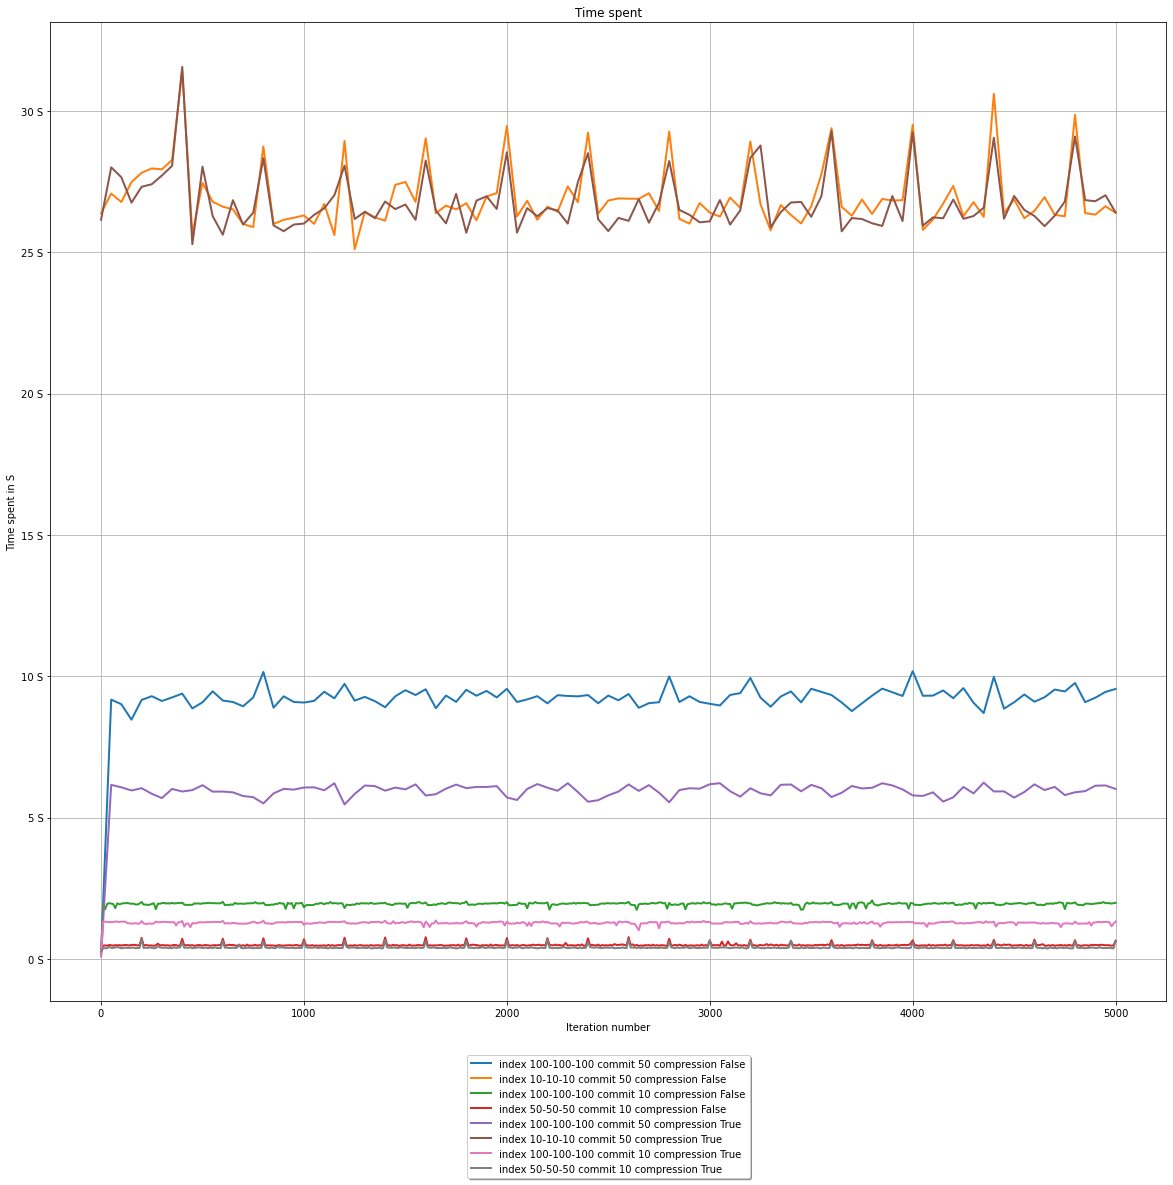

In [476]:
def get_time_row(file_name,row_name):
    i = 0
    file = open(file_name)
    csvreader = csv.reader(file)
    all_elm = next(csvreader)[0].split(";")
#     print(all_elm)
    idx = all_elm.index(row_name)
    print("item index {} = {}".format(row_name,idx))
    x = []
    y = []
    for row in csvreader:
        itm = row[0].split(";")[idx]
        if itm != '':
            val = float(itm)
            if val > 0:
                time = float(itm) 
                x.append(i)
                y.append(time)
        i = i + 1
    file.close()
    return np.array(x),np.array(y)

legends_time = get_descriptions(full_files_time)
# list(legends.values())

print(get_time_row(full_files_time[3],'Writing_index_time'))

def plot_time(title,files,columns,filer_name,output_file,legend_map,skip_first=0,format_y=FormatStrFormatter('%.0f S')):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    grid_x  = []
    
    for f in files:
        if filer_name in f:
            for column in columns:
                x,y = get_time_row(f,column)
                grid_x = x
                name="{}".format(legend_map[f]).replace("macpro_","")
                
                name = name.replace("_Used_Size_df","")
                
#                 name = name.replace("_commit_50","")
                name = name.replace("_"," ")
                if skip_first>0:
                    x = x[skip_first:]
                    y = y[skip_first:]
                ax.plot(x, y, '-', lw=2,label = name)
            


    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    plt.xlabel("Iteration number")
    plt.ylabel("Time spent in S")
#     grid_elm = grid_x
    
#     grid_x = []
#     jump = 3
#     i = 0

#     for x in grid_elm:
#         if i == jump:
#             i=0
#             grid_x.append(x+1)
#         else:
#             i = i+1
#     plt.xticks(grid_x)
#     plt.xscale('mercator')
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(format_y)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()


    
plot_time(title="Time spent",files=full_files_time,columns=[ 'Commit_time'], filer_name = "",output_file='full_time_spent_commit_new.png',legend_map=legends_time)


item index GC_time = 3
item index GC_time = 3
item index GC_time = 4
item index GC_time = 4
item index GC_time = 3
item index GC_time = 3
item index GC_time = 4
item index GC_time = 4


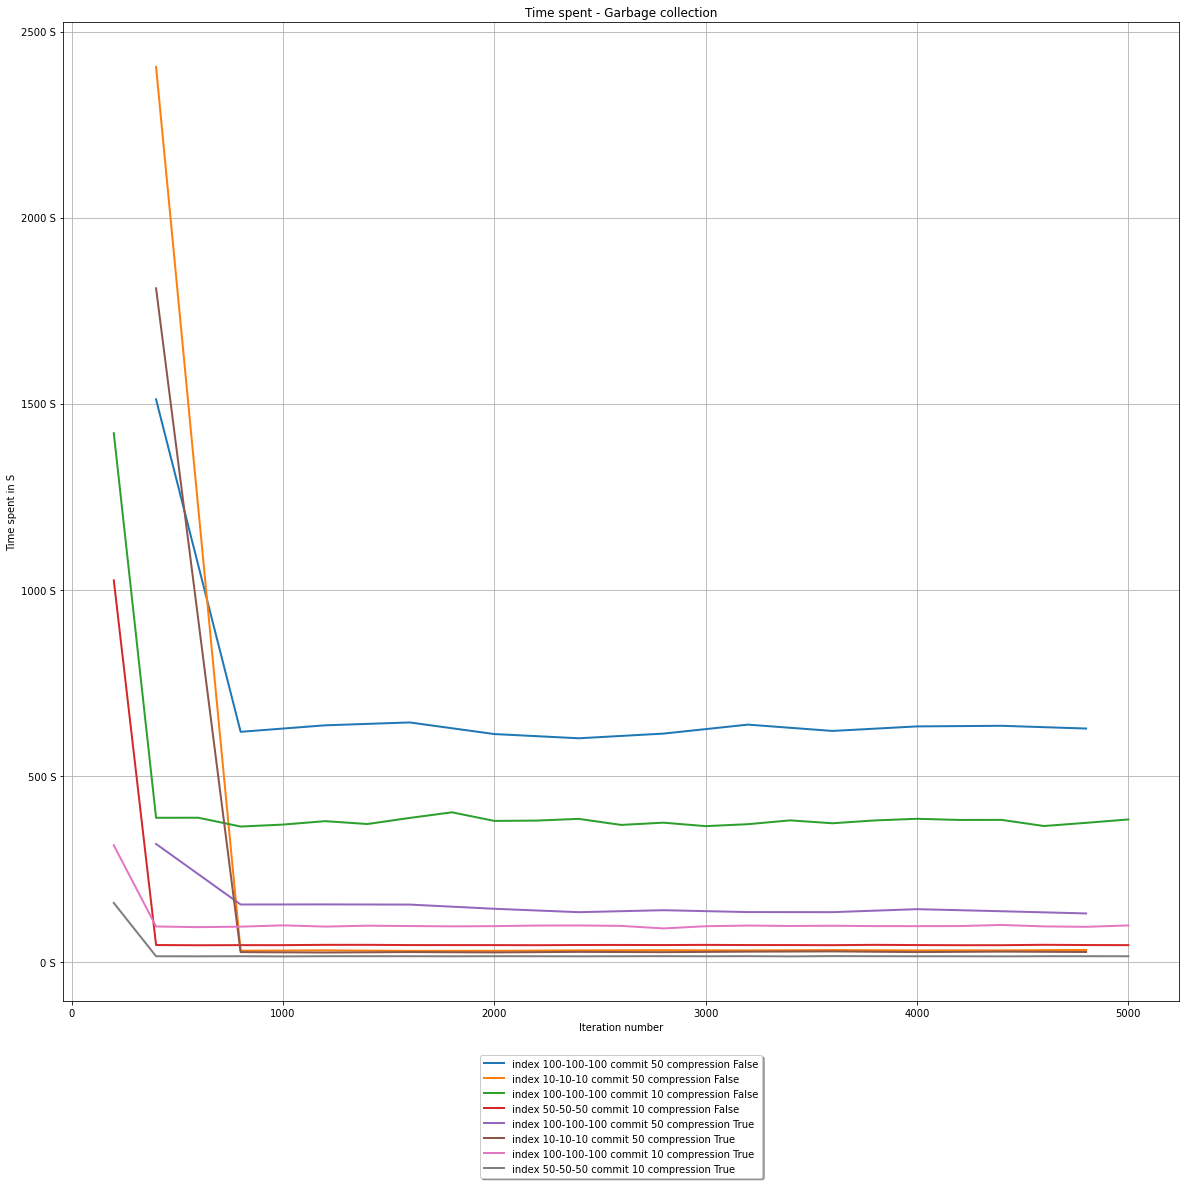

In [477]:
plot_time(title="Time spent - Garbage collection",files=full_files_time,columns=[ 'GC_time'], filer_name = "",output_file='full_time_gc_new.png',legend_map=legends_time)


item index GC_time = 3
item index GC_time = 3
item index GC_time = 4
item index GC_time = 4
item index GC_time = 3
item index GC_time = 3
item index GC_time = 4
item index GC_time = 4


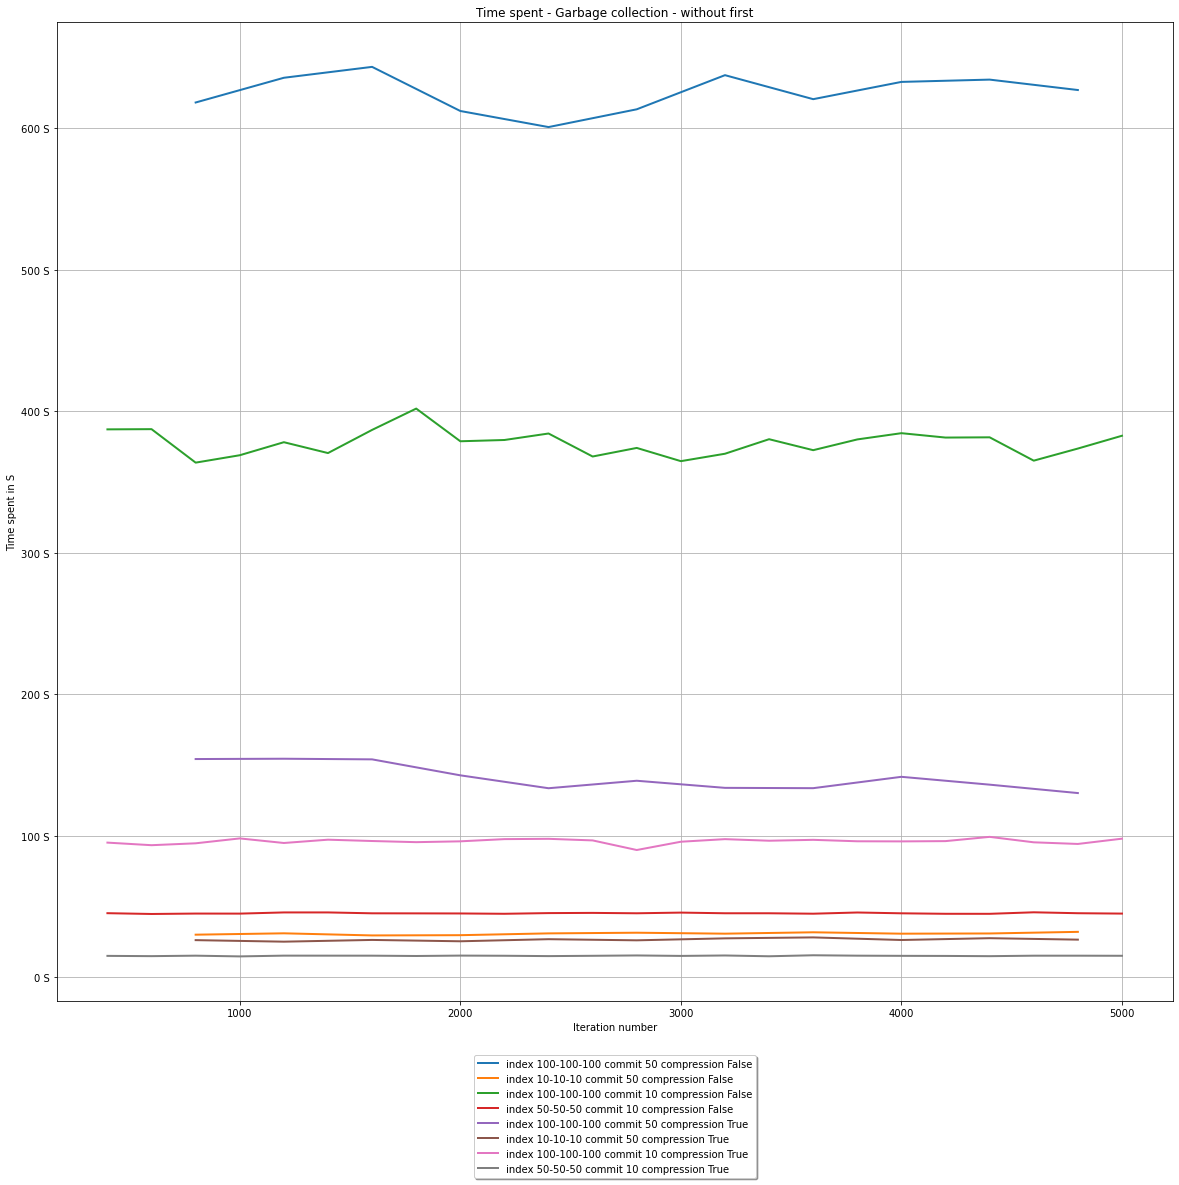

In [478]:
plot_time(title="Time spent - Garbage collection - without first",files=full_files_time,columns=[ 'GC_time'], filer_name = "",output_file='full_time_gc_no_first_new.png',legend_map=legends_time,skip_first = 1)


item index Writing_index_time = 0
item index Writing_index_time = 0
item index Writing_index_time = 1
item index Writing_index_time = 1
item index Writing_index_time = 0
item index Writing_index_time = 0
item index Writing_index_time = 1
item index Writing_index_time = 1


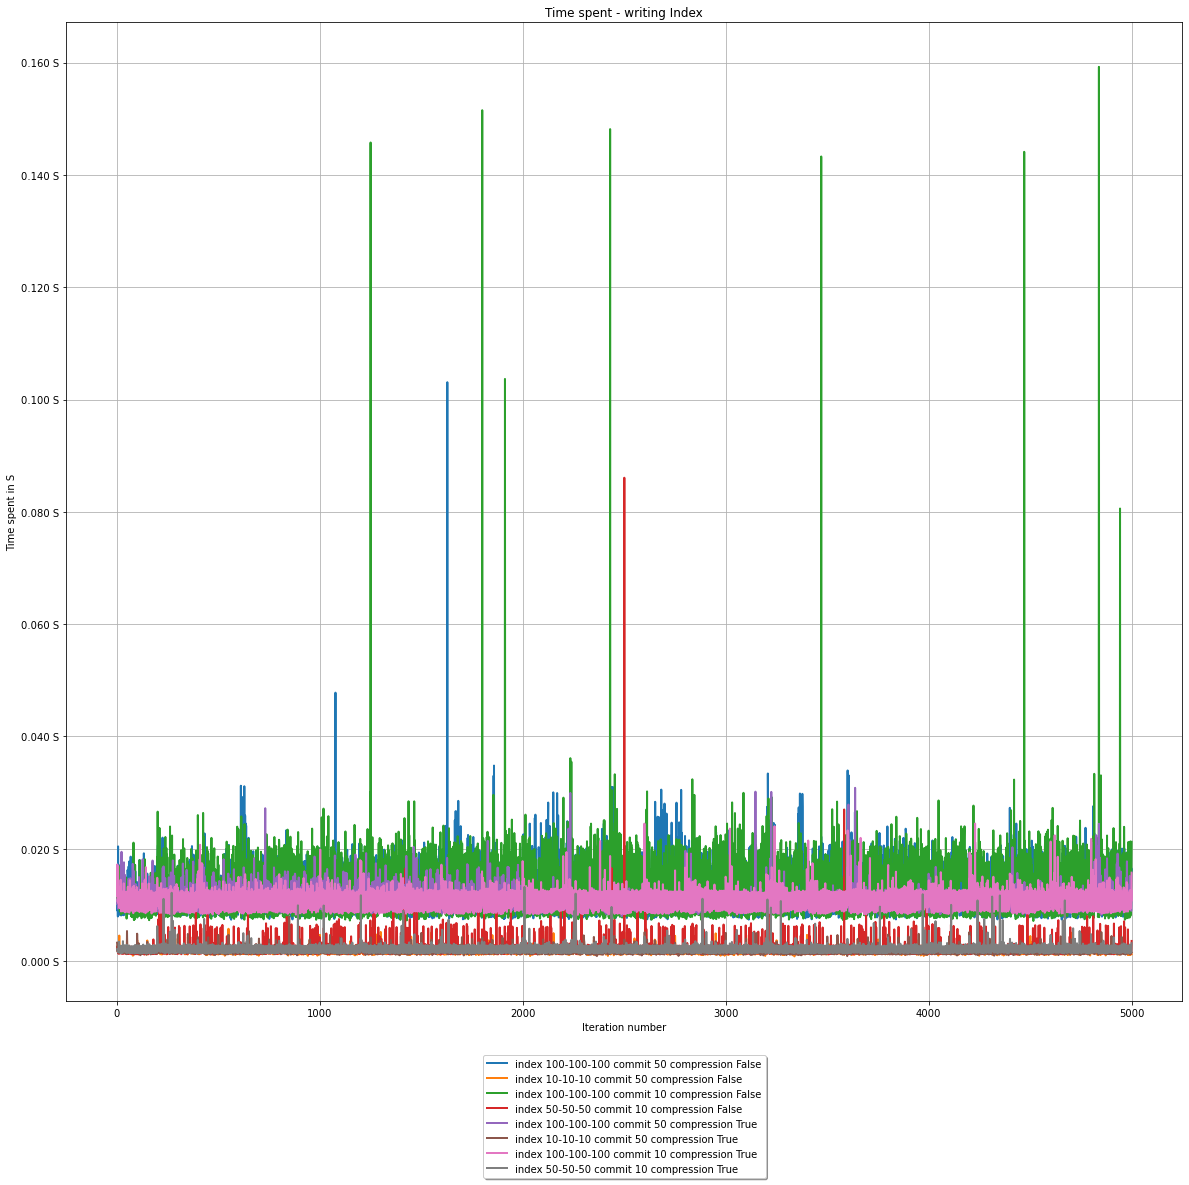

In [479]:
# ['Writing_index_time', 'Commit_time', 'Checkout_time', 'GC_time']
plot_time(title="Time spent - writing Index",files=full_files_time,columns=[ 'Writing_index_time'], filer_name = "",output_file='full_time_index_writing_new.png',legend_map=legends_time,skip_first = 2,format_y=FormatStrFormatter('%.3f S'))


# Incremental files

In [483]:
incremental_files_time 

x = get_all_length(incremental_files_time)
x.sort()
print(x)

[251, 400, 600, 600, 1685, 2764, 4266, 4541, 4770, 5121, 10650, 13299, 13935, 15815, 20125, 30300, 32493, 35757, 41455, 44417, 45650, 183701, 376500, 392000, 474000, 480000, 1000001, 1000001, 1000001, 1000001, 1000001]


In [493]:
 incremental_files_time,incremental_files_size = filter_length(incremental_files_time,incremental_files_size,1000000)

0
../../benchmarks/v3/mac_pro/macpro_20220324_12_40_55_time_benchmark_iter_1000000_shape_1000-1000-1000_index_1-1-1_commit_10000_compression_False.csv
1000001
22001
3
../../benchmarks/v3/mac_pro/macpro_20220325_16_29_57_time_benchmark_iter_1000000_shape_1000-1000-1000_index_10-10-10_commit_10000_compression_False.csv
1000001
22001
4
../../benchmarks/v3/mac_pro/macpro_20220325_20_54_36_time_benchmark_iter_1000000_shape_1000-1000-1000_index_1-1-1_commit_10000_compression_False.csv
1000001
22001
5
../../benchmarks/v3/mac_pro/macpro_20220326_02_10_15_time_benchmark_iter_1000000_shape_1000-1000-1000_index_100-100-100_commit_10000_compression_True.csv
1000001
22001
6
../../benchmarks/v3/mac_pro/macpro_20220326_04_52_28_time_benchmark_iter_1000000_shape_1000-1000-1000_index_10-10-10_commit_10000_compression_True.csv
1000001
22001


In [494]:
legends_size_inc = get_descriptions(incremental_files_size)

item index Used_Size_df = 2
item index Used_Size_df = 2
item index Used_Size_df = 2
item index Used_Size_df = 2
item index Used_Size_df = 2


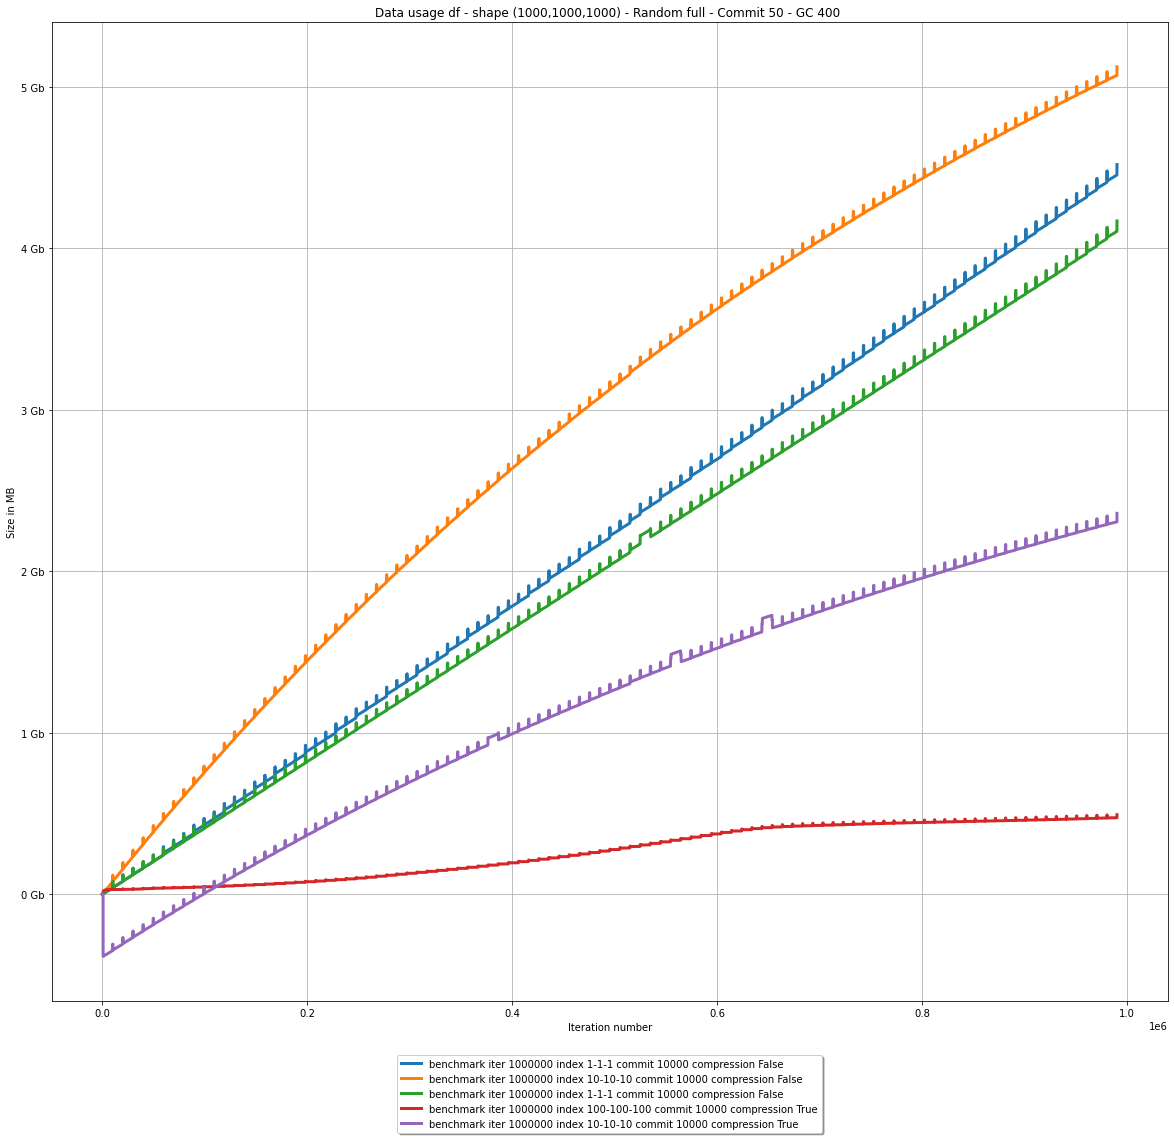

In [498]:
def plot_size_usage_2(pos,title,files,columns,filer_name,output_file,legend_map,first  = 167347888):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    ax = plt.subplot(111)
    grid_x  = []
    
    for f in files:
        if filer_name in f:
            for column in columns:
                x,y = get_size_row_indexed(pos,f,column,first)
                if len(x)==0:    
                    print("None "+f)
                else:
                    grid_x = x
                    name="{}_{}".format(legend_map[f],column).replace("macpro_","")

                    name = name.replace("_Used_Size_df","")

    #                 name = name.replace("_commit_50","")
                    name = name.replace("_"," ")
                    ax.plot(x, y, '-', lw=3,label = name)
            


    # ax.show()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    # plt.legend()
    plt.title(title)
    plt.xlabel("Iteration number")
    plt.ylabel("Size in MB")

#     plt.xscale('mercator')
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d Gb'))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=1)
    plt.savefig(output_file ,dpi=100)
    plt.show()


    

plot_size_usage_2(pos=[i*45 for i in range(100000)],title="Data usage df - shape (1000,1000,1000) - Random full - Commit 50 - GC 400 ",files=incremental_files_size,columns=['Used_Size_df'], filer_name = "macpro",output_file='inc_Used_Size_df.png',legend_map=legends_size_inc,first = 1)
